Install [Specutils package](http://specutils.readthedocs.io/en/latest/index.html) through conda:

`> conda install -c astropy specutils=0.2.2`

Then you can plot spectra in python with the following:

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from specutils import Spectrum1D
from specutils.wcs import specwcs

%matplotlib notebook

For plotting within the notebook, I use `notebook` backend, so that the plot is interactive and things like zoom and pan are enabled.

The code is very simple and you should be able to tweak it as you want. Nevertheless, I wrote it so that you can just give it the file name and extension you want.

<IPython.core.display.Javascript object>


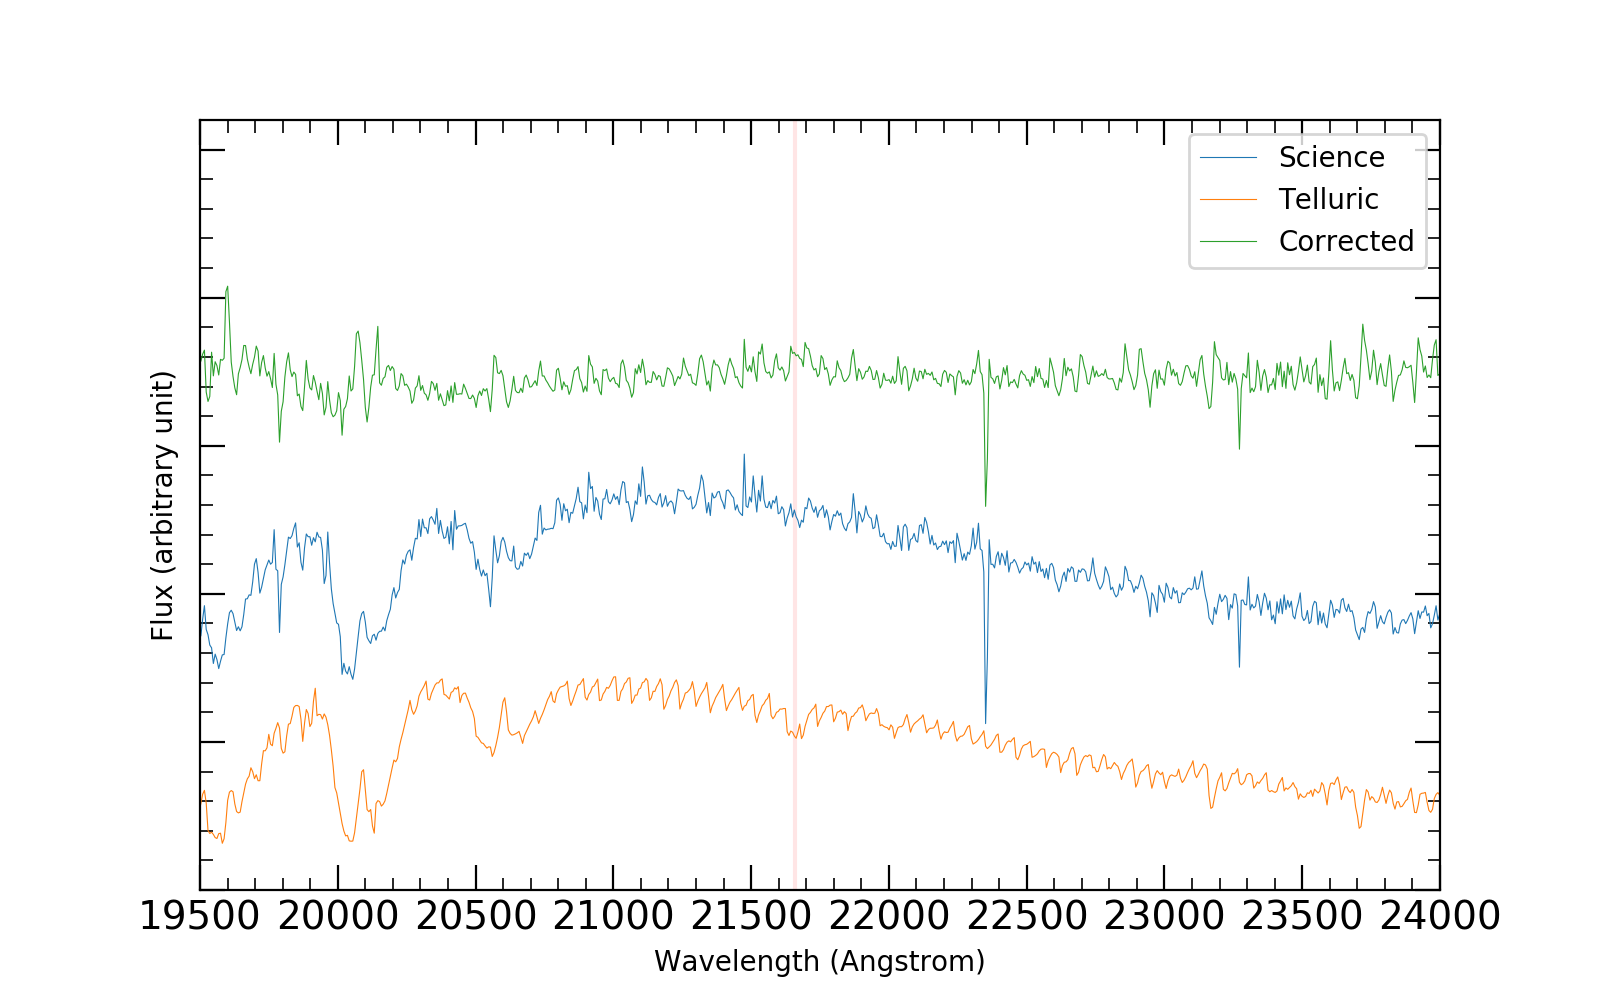

In [2]:
#Science spectrum
filename = 'xtfobj_comb_aug.fits'
extension = 1
spec_file = fits.open(filename)[extension]
spec_wcs = specwcs.Spectrum1DPolynomialWCS(degree=1, unit='angstrom', c0=spec_file.header['CRVAL1'], c1=spec_file.header['CD1_1'])
spec_sci = Spectrum1D(flux=spec_file.data, wcs=spec_wcs)

#Standard star (telluric) spectrum
filename = 'xtftell_comb_aug.fits'
extension = 1
spec_file = fits.open(filename)[extension]
spec_wcs = specwcs.Spectrum1DPolynomialWCS(degree=1, unit='angstrom', c0=spec_file.header['CRVAL1'], c1=spec_file.header['CD1_1'])
spec_tel = Spectrum1D(flux=spec_file.data, wcs=spec_wcs)

#A preliminary version of telluric-subtracted science spectrum
filename = 'test.fits'
extension = 0
spec_file = fits.open(filename)[extension]
spec_wcs = specwcs.Spectrum1DPolynomialWCS(degree=1, unit='angstrom', c0=spec_file.header['CRVAL1'], c1=spec_file.header['CD1_1'])
spec_corr = Spectrum1D(flux=spec_file.data, wcs=spec_wcs)

## Plotting:
plt.figure(figsize=(8,5))
plt.plot(spec_sci.dispersion,spec_sci.flux,lw=0.4, label='Science')
# I have rescaled and shifted the telluric spectrum by arbitrary values just for ease of comparison
plt.plot(spec_tel.dispersion,spec_tel.flux/500-100,lw=0.4, label='Telluric')   
# Shift just for plotting purposes
plt.plot(spec_corr.dispersion,spec_corr.flux+150,lw=0.4, label='Corrected')

## If you want to overlay known lines to keep track and check if they are there, you can replicate the following line:

plt.vlines(21660,-100,420,linestyles='-',color='r',alpha=0.1)   # Hydrogen Br-Gamma, lambda=21660 angstrom

# Plot configuration
plt.legend()
plt.xlim(19500,24000)
plt.ylim(-100,420)
plt.ylabel('Flux (arbitrary unit)')
plt.xlabel('Wavelength (Angstrom)')
plt.minorticks_on()
plt.gca().axes.set_yticklabels([])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')